# Pymaceuticals Inc.
---

### Analysis

- Data Overview: The study involved 249 mice and several drug regimens. Capomulin and Ramicane had the most measurements.
Gender: The gender distribution was nearly equal between male and female mice.
Tumor Volume: Capomulin and Ramicane had lower average tumor volumes than Infubinol and Ceftamin.
Outliers: Infubinol had one potential outlier in the final tumor volume.
Tumor Volume Over Time: For one mouse treated with Capomulin, the tumor volume decreased over time.
Correlation: There was a strong positive correlation (0.84) between mouse weight and average tumor volume in the Capomulin treatment.
 

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "./Pymaceuticals/data/Mouse_metadata.csv"
study_results_path = "./Pymaceuticals/data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
print(merged_data)

     Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint   
0        k403     Ramicane  Male          21          16          0  \
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1888     z969     Naftisol  Male           9          30         25   
1889     z969     Naftisol  Male           9          30         30   
1890     z969     Naftisol  Male           9          30         35   
1891     z969     Naftisol  Male           9          30         40   
1892     z969     Naftisol  Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1              38.825898                 0  
2           

In [21]:
# Checking the number of mice.
unique_mice = merged_data["Mouse ID"].nunique()
print(unique_mice)

249


In [54]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_data = merged_data[merged_data.duplicated(subset=["Mouse ID", "Timepoint"])]
duplicated_mouse_id = duplicated_data["Mouse ID"].unique()[0]
print("Duplicated ID:", duplicated_mouse_id)
print(duplicated_data)

Duplicated ID: g989
    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint   
909     g989     Propriva  Female          21          26          0  \
911     g989     Propriva  Female          21          26          5   
913     g989     Propriva  Female          21          26         10   
915     g989     Propriva  Female          21          26         15   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
909           45.000000                 0  
911           47.570392                 0  
913           49.880528                 0  
915           53.442020                 0  
917           54.657650                 1  


In [55]:
# Optional: Get all the data for the duplicate mouse ID. 


In [70]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data = merged_data[merged_data["Mouse ID"] != duplicated_mouse_id]

In [71]:
# Checking the number of mice in the clean DataFrame.


## Summary Statistics

In [84]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
mean_tumor_volume = cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median_tumor_volume = cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
variance_tumor_volume = cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
std_dev_tumor_volume = cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sem_tumor_volume = cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

summary_stats_df = pd.DataFrame({"Mean": mean_tumor_volume,
                                 "Median": median_tumor_volume,
                                 "Variance": variance_tumor_volume,
                                 "Standard Deviation": std_dev_tumor_volume,
                                 "SEM": sem_tumor_volume})

print(summary_stats_df)

                   Mean     Median   Variance  Standard Deviation       SEM
Drug Regimen                                                               
Capomulin     40.675741  41.557809  24.947764            4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177            6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684            6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577            8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479            8.134708  0.596466
Placebo       54.033581  52.288934  61.168083            7.821003  0.581331
Propriva      52.320930  50.446266  43.852013            6.622085  0.544332
Ramicane      40.216745  40.673236  23.486704            4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562            7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355            6.966589  0.516398


In [96]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats = cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])
print(summary_stats)

                   mean     median        var       std       sem
Drug Regimen                                                     
Capomulin     40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479  8.134708  0.596466
Placebo       54.033581  52.288934  61.168083  7.821003  0.581331
Propriva      52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane      40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355  6.966589  0.516398


## Bar and Pie Charts

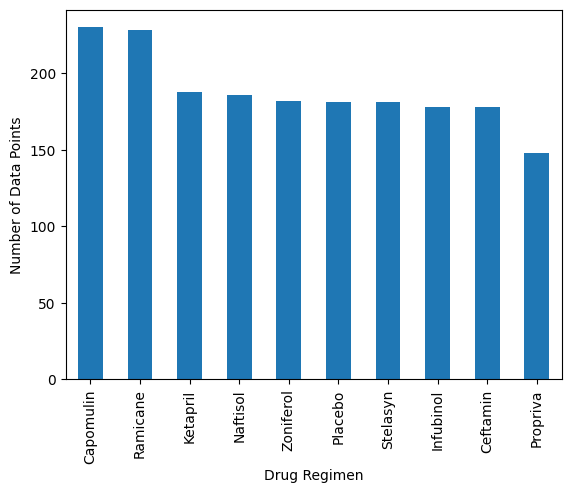

In [107]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
bar_chart_data = cleaned_data["Drug Regimen"].value_counts()

# Using pandas
bar_chart_data.plot(kind="bar")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
plt.show()

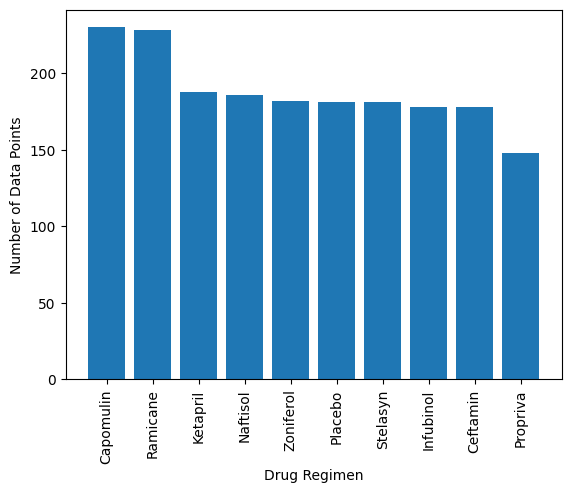

In [117]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(bar_chart_data.index, bar_chart_data.values)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
plt.xticks(rotation=90)
plt.show()

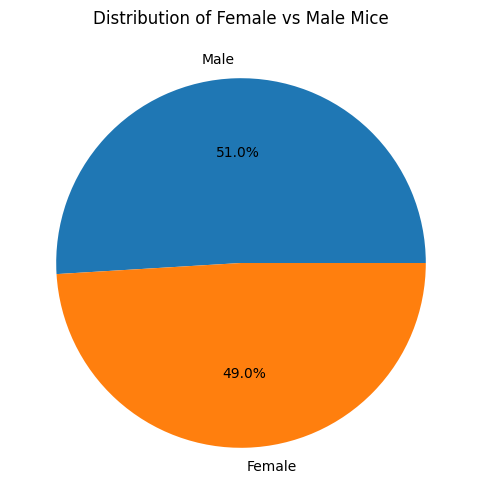

In [165]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
pie_chart_data = cleaned_data["Sex"].value_counts()
pie_chart_data.plot(kind="pie", autopct="%1.1f%%", figsize=(10,6))
plt.title("Distribution of Female vs Male Mice")
plt.ylabel('')  # Hide y-label as it's not necessary in this case
plt.show()

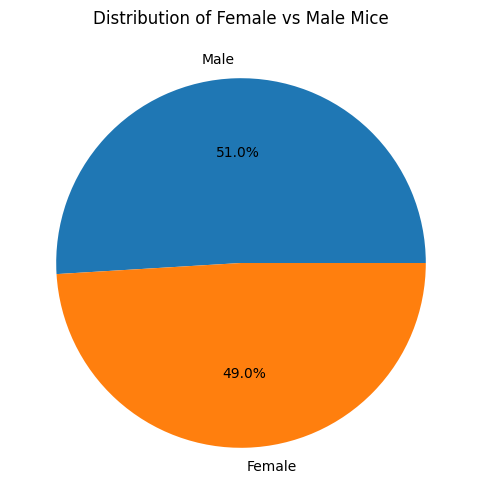

In [170]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.figure(figsize=(10,6))
plt.pie(pie_chart_data.values, labels=pie_chart_data.index, autopct="%1.1f%%")
plt.title("Distribution of Female vs Male Mice")
plt.show()

## Quartiles, Outliers and Boxplots

In [178]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Define the four treatment regimens
treatment_regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Filter the original dataframe to include data for the four treatment regimens
filtered_data = cleaned_data[cleaned_data["Drug Regimen"].isin(treatment_regimens)]

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint_data = filtered_data.groupby(["Mouse ID"])["Timepoint"].max()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_df = pd.merge(max_timepoint_data, filtered_data,  on=["Mouse ID", "Timepoint"], how="left")

# Display the result
merged_df.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a275,45,Ceftamin,Female,20,28,62.999356,3
3,a411,45,Ramicane,Male,3,22,38.407618,1
4,a444,45,Ramicane,Female,10,25,43.047543,0


In [181]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for drug in treatment_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = merged_df.loc[merged_df["Drug Regimen"] == drug, 'Tumor Volume (mm3)']
    
    # add subset 
    tumor_vol_data.append(final_tumor_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = final_tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]
    print(f"{drug}'s potential outliers: {outliers}")


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 15    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


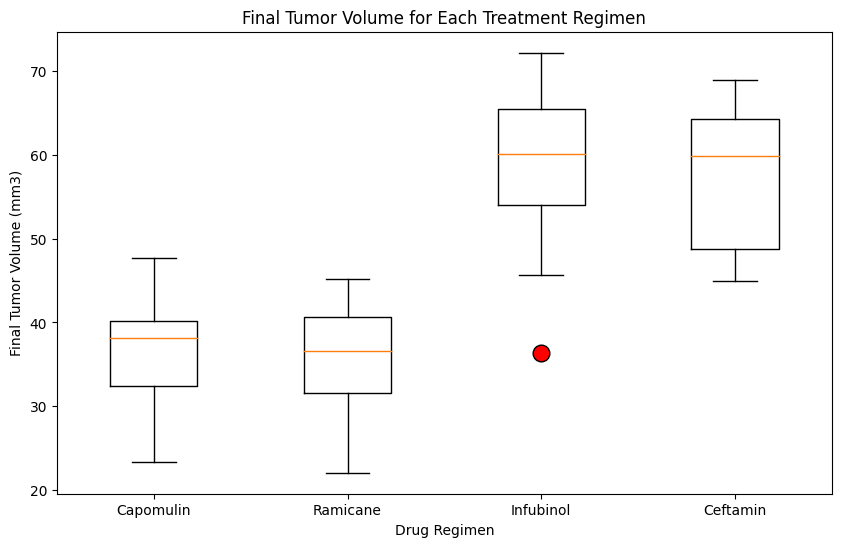

In [183]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.figure(figsize=(10,6))
plt.boxplot(tumor_vol_data, labels=treatment_list, flierprops={'markerfacecolor':'red','markersize':12})
plt.title('Final Tumor Volume for Each Treatment Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

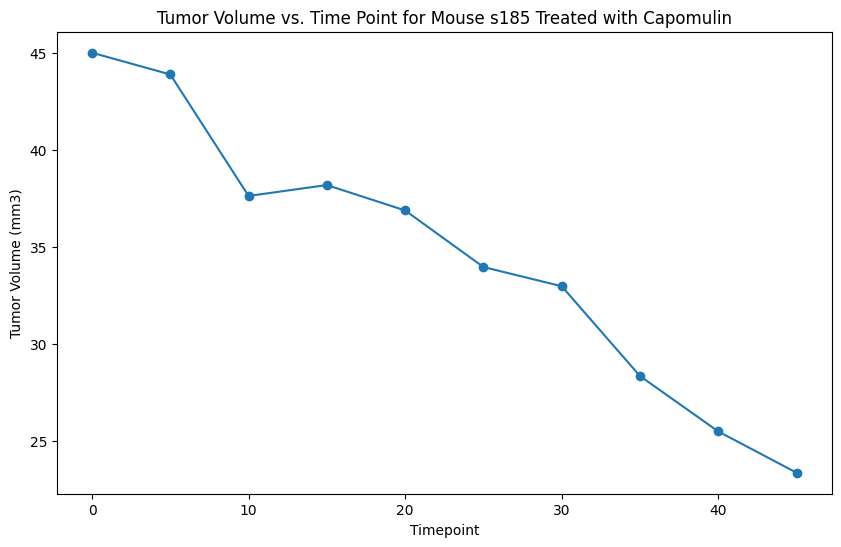

In [187]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

# Select a mouse that was treated with Capomulin
mouse_id = cleaned_data.loc[cleaned_data["Drug Regimen"] == "Capomulin"].iloc[0]["Mouse ID"]

# Filter the original data for the selected mouse
mouse_data = cleaned_data[cleaned_data["Mouse ID"] == mouse_id]

# Generate a line plot of tumor volume vs. time point for the selected mouse treated with Capomulin
plt.figure(figsize=(10,6))
plt.plot(mouse_data["Timepoint"], mouse_data["Tumor Volume (mm3)"], marker='o')
plt.title(f"Tumor Volume vs. Time Point for Mouse {mouse_id} Treated with Capomulin")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.show()


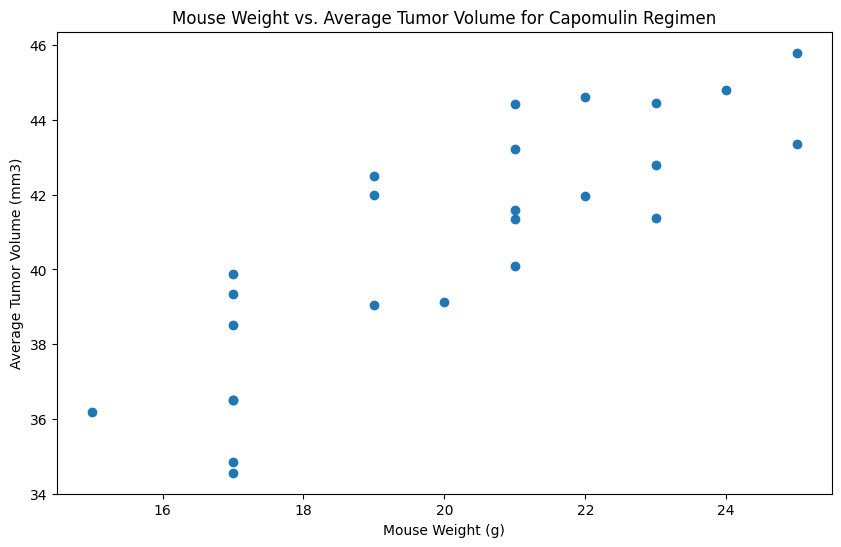

In [190]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# Filter the original data for the Capomulin regimen
capomulin_data = cleaned_data[cleaned_data["Drug Regimen"] == "Capomulin"]

# Calculate the average tumor volume for each mouse under the Capomulin regimen
average_tumor_vol = capomulin_data.groupby(["Mouse ID"])["Tumor Volume (mm3)"].mean()

# Merge the average tumor volume data with the original Capomulin data to include the mouse weights
merged_capomulin_data = pd.merge(average_tumor_vol, capomulin_data, on="Mouse ID").drop_duplicates("Mouse ID")

# Generate a scatter plot of mouse weight vs. average tumor volume for the Capomulin regimen
plt.figure(figsize=(10,6))
plt.scatter(merged_capomulin_data["Weight (g)"], merged_capomulin_data["Tumor Volume (mm3)_x"])
plt.title("Mouse Weight vs. Average Tumor Volume for Capomulin Regimen")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

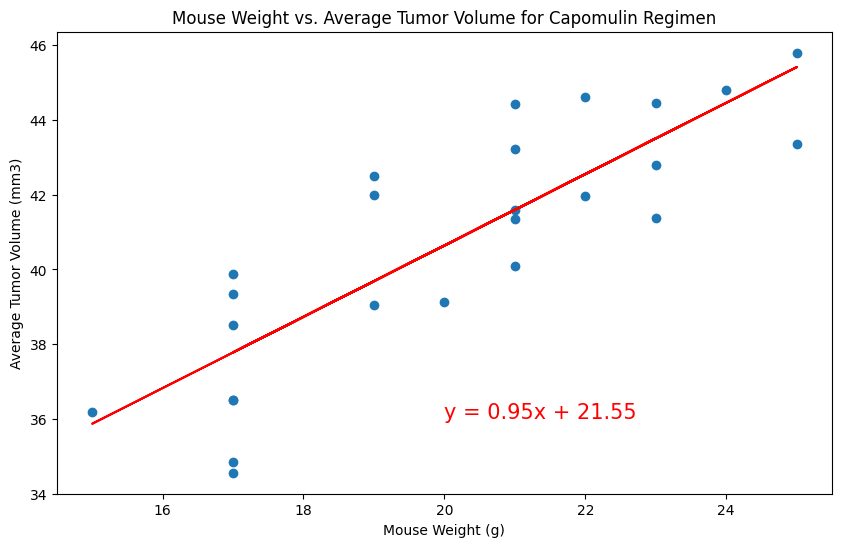

The correlation between mouse weight and the average tumor volume is 0.8419363424694721


In [192]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# Import necessary libraries
from scipy.stats import pearsonr, linregress

# Calculate the correlation coefficient for mouse weight and average tumor volume for the Capomulin regimen
correlation = pearsonr(merged_capomulin_data["Weight (g)"], merged_capomulin_data["Tumor Volume (mm3)_x"])[0]

# Calculate the linear regression model for mouse weight and average tumor volume for the Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = linregress(merged_capomulin_data["Weight (g)"], merged_capomulin_data["Tumor Volume (mm3)_x"])
regress_values = merged_capomulin_data["Weight (g)"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Generate a scatter plot of mouse weight vs. average tumor volume for the Capomulin regimen
plt.figure(figsize=(10,6))
plt.scatter(merged_capomulin_data["Weight (g)"], merged_capomulin_data["Tumor Volume (mm3)_x"])
plt.plot(merged_capomulin_data["Weight (g)"], regress_values, "r-")
plt.annotate(line_eq,(20,36),fontsize=15,color="red")
plt.title("Mouse Weight vs. Average Tumor Volume for Capomulin Regimen")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

# Print the correlation coefficient
print(f"The correlation between mouse weight and the average tumor volume is {correlation}")
